<a href="https://colab.research.google.com/github/KhotNoorin/Deep-Learning-Notes/blob/main/Feature_Scaling_in_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Scaling in Artificial Neural Networks (ANN)

Feature scaling is a preprocessing technique used to normalize or standardize the input features of a dataset before training a neural network.

---

#### Why is Feature Scaling Important?

- Neural networks are sensitive to the scale of input data.
- Features with large values can dominate the learning process, making training unstable or slow.
- Scaling helps ensure that all features contribute equally to the model's learning.
- It improves the convergence speed of gradient descent during training.

---

#### Common Methods of Feature Scaling

1. **Min-Max Normalization (Rescaling)**
   - Scales data to a fixed range, usually [0, 1] or [-1, 1].
   - Formula:  
     `X_scaled = (X - X_min) / (X_max - X_min)`

2. **Standardization (Z-score Normalization)**
   - Centers the data around zero with unit variance.
   - Formula:  
     `X_scaled = (X - mean) / standard_deviation`

---

#### When to Use Which?

- **Min-Max Scaling** is preferred when the data does not contain many outliers.
- **Standardization** is more robust when outliers are present or when input features have different units or ranges.

---

#### Scaling and Activation Functions

- Feature scaling is especially important when using activation functions like sigmoid or tanh:
  - These functions saturate for large input values, leading to vanishing gradients.
  - Scaled inputs help keep the activations in the sensitive region of the function.
- Even with ReLU, scaling helps maintain stability in the training process.

---

#### Summary

Feature scaling ensures that neural networks train faster and more effectively by giving all input features an equal footing. Proper scaling improves gradient flow and prevents one feature from dominating the learning process.


In [31]:
import numpy as np
import pandas as pd

In [32]:
df = pd.read_csv('/content/sample_data/Social_Network_Ads.csv')

In [33]:
df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [34]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

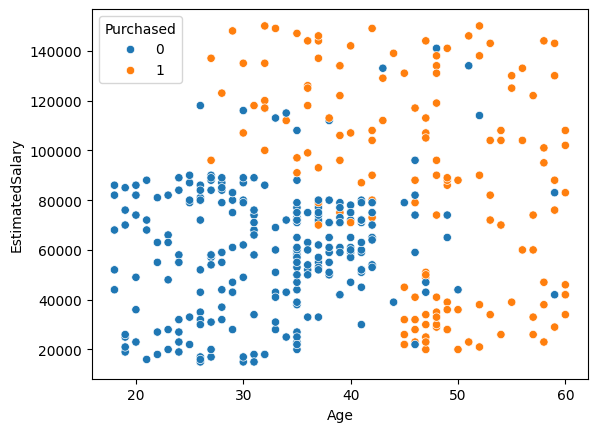

In [35]:
sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,1], hue=df.iloc[:,2])

In [36]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [38]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [39]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [42]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4408 - loss: 485.3643 - val_accuracy: 0.4000 - val_loss: 18.1866
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5032 - loss: 109.2311 - val_accuracy: 0.6000 - val_loss: 94.0720
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6006 - loss: 142.0846 - val_accuracy: 0.6000 - val_loss: 59.3740
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5732 - loss: 59.2620 - val_accuracy: 0.4000 - val_loss: 135.7581
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4559 - loss: 93.8580 - val_accuracy: 0.4000 - val_loss: 5.6345
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4761 - loss: 15.6390 - val_accuracy: 0.6000 - val_loss: 21.7963
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4912 - loss: 30.6024 - val_accuracy: 0.6000 - val_loss: 24.0117
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5818 - loss: 35.1620 - val_a

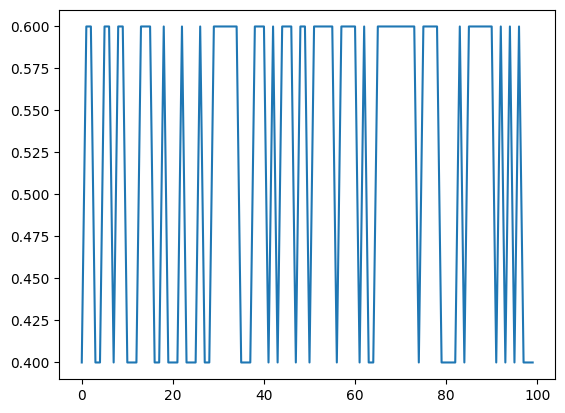

In [43]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

In [44]:
# Applying scaling

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
X_train_scaled

array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003],
       [ 1.7580637 ,  1.0213469 ],
       [-1.33091576, -1.48479975],
       [ 2.04765553,  0.54960165],
       [ 1.27541066,  1.90586924],
       [-1.13785454,  0.31372902],
       [-0.36560968, -0.77718187],
       [-1.71703819,  0.49063349],
       [-0.5586709 , -1.51428383],
       [ 0.31010458, -0.71821372],
       [ 0.02051275, -0.57079333],
       [ 0.02051275,  0.04837232],
       [-0.07601785, -0.51182517],
       [-0.6552015 , -1.51428383],
       [ 0.02051275,  0.31372902],
       [ 0.31010458,  0.07785639],
       [-0.46214029, -1.13099081],
       [-0.75173211, -1.54376791],
       [-0.26907907, -0.65924556],
       [-1.13785454,

<Axes: >

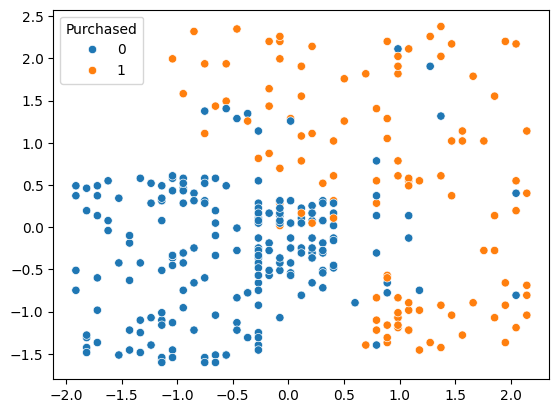

In [48]:
sns.scatterplot(x=X_train_scaled[:, 0], y=X_train_scaled[:, 1], hue=y_train)

In [49]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=100)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.3033 - loss: 0.7817 - val_accuracy: 0.5000 - val_loss: 0.7349
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5783 - loss: 0.7178 - val_accuracy: 0.6000 - val_loss: 0.6691
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6195 - loss: 0.6563 - val_accuracy: 0.7375 - val_loss: 0.6132
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7496 - loss: 0.6037 - val_accuracy: 0.7625 - val_loss: 0.5665
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8054 - loss: 0.5621 - val_accuracy: 0.7750 - val_loss: 0.5257
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8016 - loss: 0.5286 - val_accuracy: 0.7750 - val_loss: 0.4905
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8050 - loss: 0.4989 - val_accuracy: 0.7750 - val_loss: 0.4597
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8332 - loss: 0.4634 - val_accuracy: 0.8000 - val_loss: 

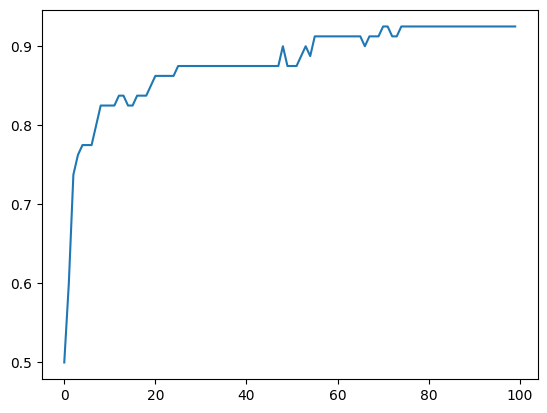

In [50]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])